In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from safetensors import safe_open

In [6]:
scores_35M = {}
scores_150M = {}
scores_650M = {}
scores_3B = {}

with safe_open(
    "../analyses/facebook/esm2_t12_35M_UR50D_self_other_ddp_seed=1/scores_facebook/esm2_t12_35M_UR50D_self_other_ddp/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_35M[k] = f.get_tensor(name=k)

with safe_open(
    "../analyses/facebook/esm2_t30_150M_UR50D_self_other_ddp_seed=1/scores_facebook/esm2_t30_150M_UR50D_self_other_ddp/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_150M[k] = f.get_tensor(name=k)

with safe_open(
    "../analyses/facebook/esm2_t33_650M_UR50D_self_other_ddp_seed=1/scores_facebook/esm2_t33_650M_UR50D_self_other_ddp/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_650M[k] = f.get_tensor(name=k)

with safe_open(
    "../analyses/facebook/esm2_t36_3B_UR50D_self_other_ddp_seed=1/scores_facebook/esm2_t36_3B_UR50D_self_other_ddp/pairwise_scores.safetensors",
    "pt"
) as f:
    for k in f.keys():
        scores_3B[k] = f.get_tensor(name=k)

In [7]:
df = pd.read_csv("../analyses/facebook/esm2_t12_35M_UR50D_self_other_ddp_seed=1/seqs.csv")
seq = df.iloc[0]['sequence']
df["influence_35M"] = scores_35M["all_modules"].numpy().flatten()
df["influence_150M"] = scores_150M["all_modules"].numpy().flatten()
df["influence_650M"] = scores_650M["all_modules"].numpy().flatten()
df["influence_3B"] = scores_3B["all_modules"].numpy().flatten()
df

,sequence,mutations,influence_35M,influence_150M,influence_650M,influence_3B
0,MTSEQALLVLGIETTCDETAAAVVERRADGSGRLLSNIVRSQTDEH...,0,5.048399e+07,1.564911e+08,4.518655e+08,2.592700e+09
1,MGEPQQVSALPPPPMQYIKEYTDENIQEGLAPKPPPPIKDSYMMFG...,292,4.437304e+04,1.472247e+05,-7.664232e+05,1.434427e+05
2,MARGPKKHLKRLAAPSHWMLDKLSGTYAPRPSAGPHKLRESLPLVV...,279,1.893568e+05,-2.194694e+04,-2.541248e+05,-3.723914e+05
3,MSGGKYVDSEGHLYTVPIREQGNIYKPNNKAMADELSEKQVYDAHT...,291,2.525747e+04,-1.889303e+04,-2.570686e+05,-4.783420e+05
4,MKLNIAYPVNGSQKKINIEDKNKVRCFMEKRIGQEVEATTLGDEFK...,277,2.613600e+05,1.198831e+05,1.252727e+06,5.769604e+05
...,...,...,...,...,...,...
123,MATTYATGKRKTAIAKVWVKPGSGKISVNGVDLNTWLGGHEAIKLK...,289,8.599351e+04,3.992572e+04,9.773218e+05,3.125096e+06
124,MASTLKPETLVKKSKAQQKTAEERAAAKVVRQASNQEKRKIIFDRA...,273,7.544385e+04,1.159966e+04,-4.716186e+05,2.251593e+06
125,MATPAQLGLMDAASPVMEEMIYFHDHVMLVLILITCLIFYSMLVLI...,279,1.748727e+04,7.907288e+04,-2.961789e+05,9.161012e+05
126,MAIKTYKPYTPSRRYITGLSSEDITAKPSVRSLLVKLPAHAGRNSY...,282,1.558342e+05,-8.567582e+04,-1.792644e+05,1.512718e+06


In [8]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp
hex_list = [
    "#631E59",
    "#77277E",
    "#7B2F99",
    "#7738B4",
    "#6B40CF",
    "#5749EA",
    "#4A61E9",
    "#4C85E7",
    "#4DA8E6",
    "#4FC9E4",
    "#50E3DC",
]

/home/cadegord/miniconda3/envs/bio-if/lib/python3.9/site-packages/seaborn/relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/cadegord/miniconda3/envs/bio-if/lib/python3.9/site-packages/seaborn/relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
/home/cadegord/miniconda3/envs/bio-if/lib/python3.9/site-packages/seaborn/re

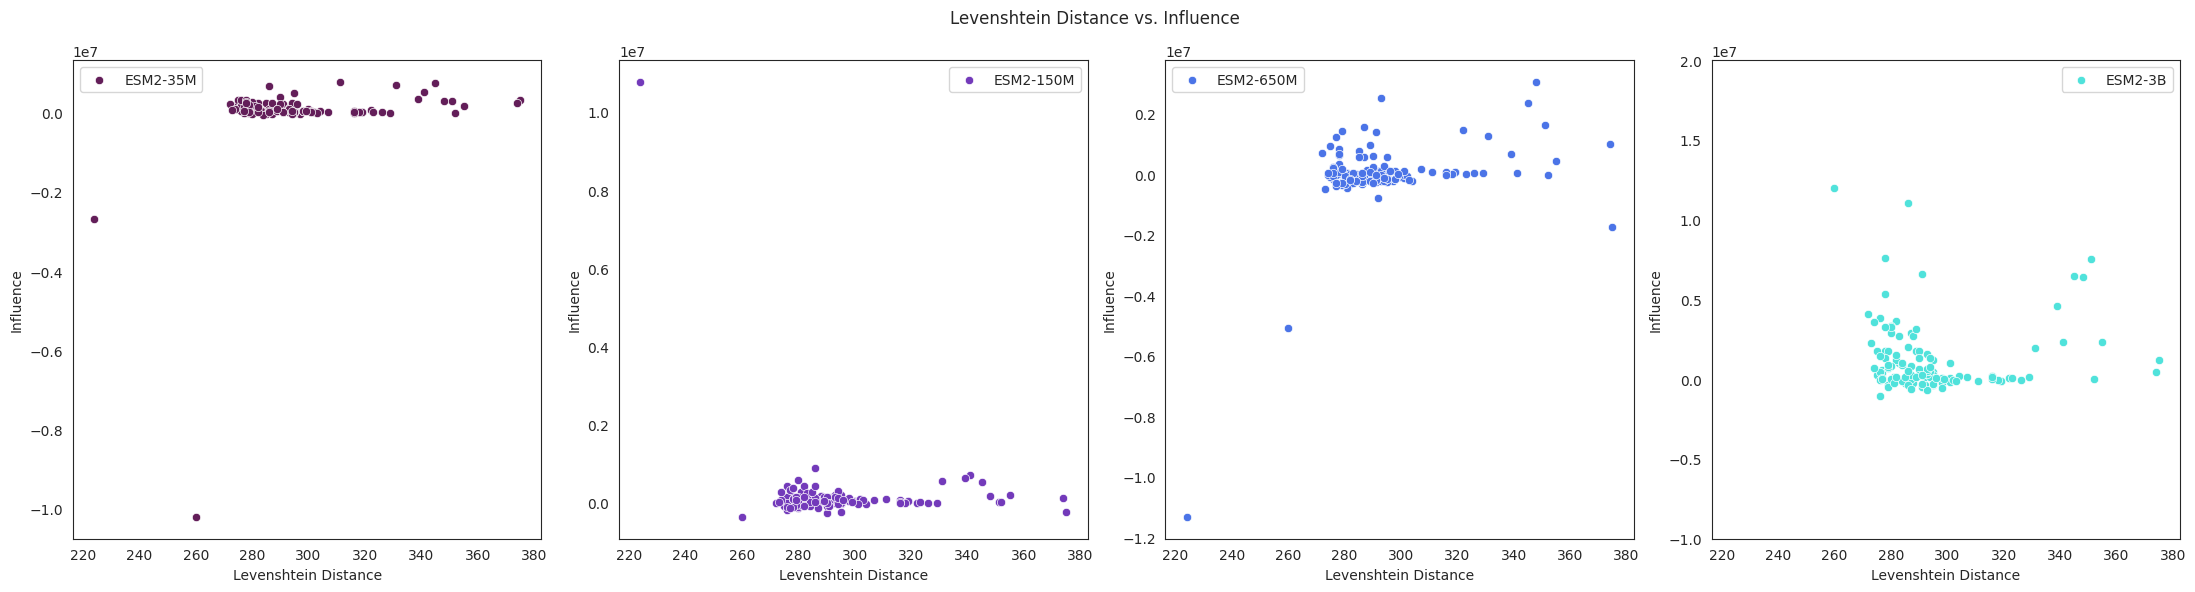

In [11]:
# cmap = plt.get_cmap("plasma")
cmap = get_continuous_cmap(hex_list)
plt.figure(figsize=(22, 6))
sns.set_style("white")
plt.suptitle("Levenshtein Distance vs. Influence")
sizes = np.log(np.array([35, 150, 650, 3000]))
sizes -= sizes.min()
sizes /= sizes.max() + 1e-3

N = 4

# First subplot
plt.subplot(1, N, 1)
plt.xlabel("Levenshtein Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="mutations", y="influence_35M", label="ESM2-35M", c=cmap(sizes[0]))
plt.legend()

# Second subplot
plt.subplot(1, N, 2)
plt.xlabel("Levenshtein Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="mutations", y="influence_150M", label="ESM2-150M", c=cmap(sizes[1]))
plt.legend()

# Third subplot
plt.subplot(1, N, 3)
plt.xlabel("Levenshtein Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="mutations", y="influence_650M", label="ESM2-650M", c=cmap(sizes[2]))
plt.legend()

# Fourth subplot
plt.subplot(1, N, 4)
plt.xlabel("Levenshtein Distance")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="mutations", y="influence_3B", label="ESM2-3B", c=cmap(sizes[3]))
plt.ylim(-1e7, 2e7)
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# List of protein sequences (replace with your sequences)
sequences = [
    SeqRecord(Seq(seq), id=f"protein{i}") for i, seq in enumerate(df["sequence"].values)
]

# Write sequences to a FASTA file
with open("sequences.fasta", "w") as f:
    SeqIO.write(sequences, f, "fasta")

In [12]:
import subprocess

# Run Clustal Omega to align sequences in proteins.fasta and output to aligned.fasta
subprocess.run(["clustalo", "-i", "sequences.fasta", "-o", "aligned.fasta", "--force", "--threads", "64"])

CompletedProcess(args=['clustalo', '-i', 'sequences.fasta', '-o', 'aligned.fasta', '--force', '--threads', '64'], returncode=0)

In [25]:
from Bio import AlignIO

# Read the alignment from the output file
alignment = AlignIO.read("aligned.fasta", "fasta")

# Print the alignment
print(alignment)

aligned_seqs = list(map(lambda x: x.replace("-", "*"), [str(record.seq) for record in alignment]))

Alignment with 128 rows and 1104 columns
--MT-----------------------------------SEQA-...--- protein0
--------------------------------------------...--- protein1
MA------------------------------------------...--- protein2
--------------------------------------------...--- protein3
--------------------------------------------...--- protein4
--------------------------------------------...--- protein5
--------------------------------------------...--- protein6
-M------------------------------------------...--- protein7
MAKTIKITQTR---------------------------------...--- protein8
--------------------------------------------...--- protein9
--------------------------------------------...YEA protein10
MA---------------------------------------KKS...--- protein11
--------------------------------------------...--- protein12
-MAT--------------------------------------TR...--- protein13
--------------------------------------------...--- protein14
--------------------------------------------...--- pro

In [26]:
import blosum
blosum62 = blosum.BLOSUM(62)

In [27]:
blosum_scores = [
    sum([blosum62[aligned_seqs[0][j]][aligned_seqs[i][j]] for j in range(len(aligned_seqs[0]))]) for i in range(len(aligned_seqs))
]

In [28]:
df["blosum62"] = blosum_scores

In [29]:
blosum_scores

[2572.0,
 -152.0,
 -1197.0,
 -1063.0,
 -927.0,
 -339.0,
 -672.0,
 -964.0,
 -634.0,
 -1062.0,
 -971.0,
 -899.0,
 -893.0,
 -646.0,
 -940.0,
 -1089.0,
 -206.0,
 -918.0,
 -1006.0,
 -877.0,
 -587.0,
 -1084.0,
 -1189.0,
 -572.0,
 -1194.0,
 -593.0,
 -968.0,
 -802.0,
 -854.0,
 -1133.0,
 -807.0,
 -543.0,
 -946.0,
 -958.0,
 -760.0,
 -930.0,
 -589.0,
 -887.0,
 -811.0,
 -973.0,
 -821.0,
 -942.0,
 -1098.0,
 -796.0,
 -785.0,
 -1167.0,
 -1223.0,
 -796.0,
 -762.0,
 -1149.0,
 -962.0,
 -947.0,
 -1003.0,
 -908.0,
 -962.0,
 -787.0,
 -1003.0,
 -908.0,
 -1007.0,
 -1496.0,
 -757.0,
 -693.0,
 -737.0,
 -16.0,
 -634.0,
 522.0,
 -913.0,
 -1120.0,
 -1108.0,
 -904.0,
 -642.0,
 -577.0,
 -1220.0,
 -985.0,
 -741.0,
 -275.0,
 -952.0,
 -876.0,
 -954.0,
 -732.0,
 -733.0,
 -981.0,
 -930.0,
 -633.0,
 -794.0,
 -878.0,
 -993.0,
 -683.0,
 -1385.0,
 -641.0,
 -1100.0,
 -895.0,
 -859.0,
 -802.0,
 -827.0,
 -655.0,
 -1002.0,
 -889.0,
 -780.0,
 -731.0,
 -533.0,
 -658.0,
 -1188.0,
 -774.0,
 -913.0,
 -963.0,
 -608.0,
 -1121.0,
 -697

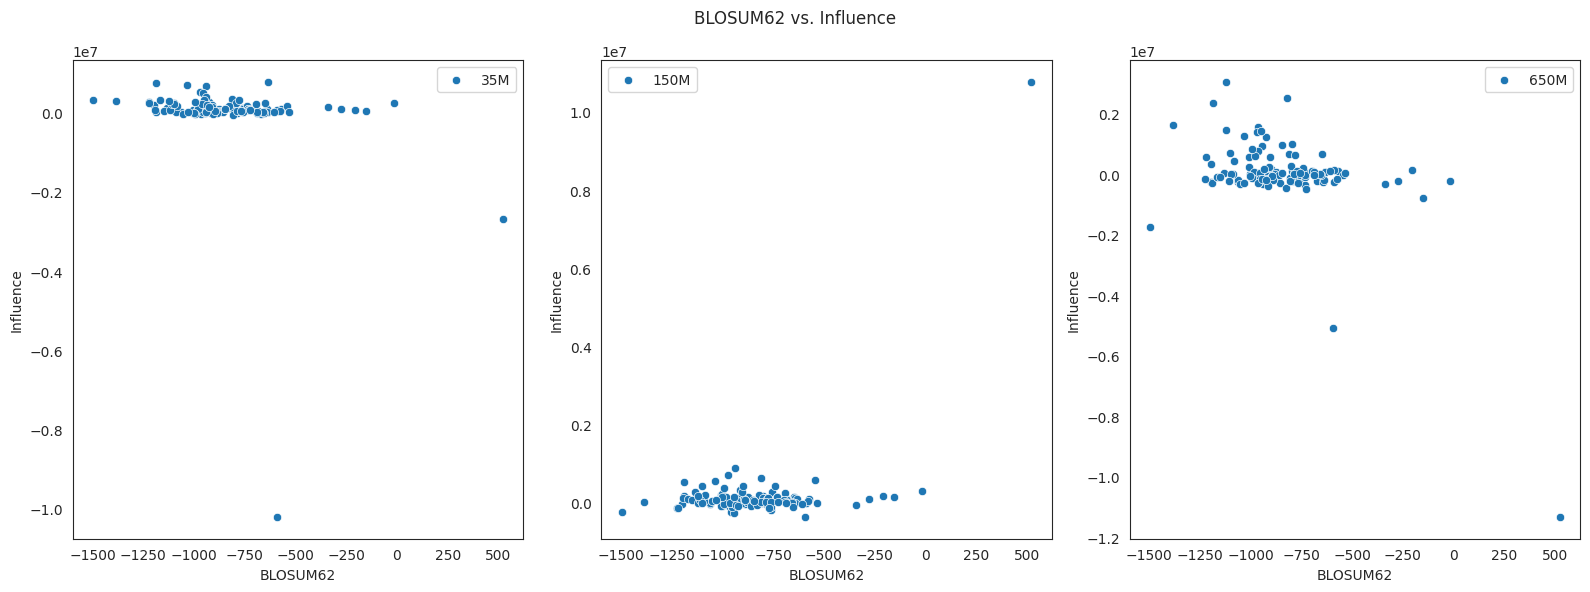

In [31]:
plt.figure(figsize=(16, 6))
sns.set_style("white")
plt.suptitle("BLOSUM62 vs. Influence")

# First subplot
plt.subplot(1, 3, 1)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="blosum62", y="influence_35M", label="35M")
plt.legend()
    
# Second subplot
plt.subplot(1, 3, 2)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="blosum62", y="influence_150M", label="150M")
plt.legend()

# Third subplot
plt.subplot(1, 3, 3)
plt.xlabel("BLOSUM62")
plt.ylabel("Influence")
sns.scatterplot(data=df.iloc[1:], x="blosum62", y="influence_650M", label="650M")

# Fourth subplot
# plt.subplot(1, 4, 4)
# plt.xlabel("BLOSUM62")
# plt.ylabel("Influence")
# sns.scatterplot(data=df, x="blosum62", y="influence_3B", label="3B")


plt.tight_layout()
plt.show()

In [37]:
# compute spearman and pearsons
from scipy.stats import spearmanr, pearsonr

correlations = {}

correlations["Levenshtein_35M"] = spearmanr(df["mutations"], df["influence_35M"])
correlations["Levenshtein_150M"] = spearmanr(df["mutations"], df["influence_150M"])
correlations["Levenshtein_650M"] = spearmanr(df["mutations"], df["influence_650M"])
correlations["Levenshtein_3B"] = spearmanr(df["mutations"], df["influence_3B"])
# correlations["blosum_35M"] = spearmanr(df["blosum62"], df["influence_35M"])
# correlations["blosum_150M"] = spearmanr(df["blosum62"], df["influence_150M"])
# correlations["blosum_650M"] = spearmanr(df["blosum62"], df["influence_650M"])
# correlations["blosum_3B"] = spearmanr(df["blosum62"], df["influence_3B"])

correlations


{'Levenshtein_35M': SignificanceResult(statistic=0.21163123423035965, pvalue=0.016481508013414636),
 'Levenshtein_150M': SignificanceResult(statistic=0.29633179796745934, pvalue=0.0006829374964288437),
 'Levenshtein_650M': SignificanceResult(statistic=0.21821225228979238, pvalue=0.0133434982269429),
 'Levenshtein_3B': SignificanceResult(statistic=0.16683453043102062, pvalue=0.059806835175354456)}

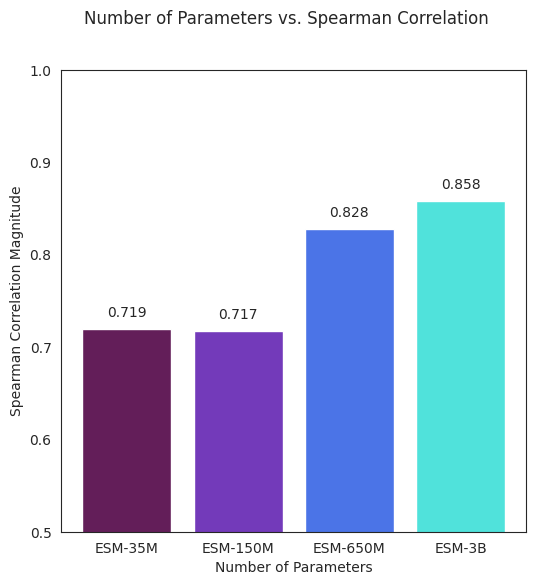

In [70]:
# plot number of parameters vs. hamming distance spearman
plt.figure(figsize=(6, 6))
sns.set_style("white")
plt.suptitle("Number of Parameters vs. Spearman Correlation")
sizes = np.array([35e6, 150e6, 650e6, 3e9])
sizes_text = ["ESM-35M", "ESM-150M", "ESM-650M", "ESM-3B"]
sizes_color_values = np.log(sizes)
sizes_color_values -= sizes_color_values.min()
sizes_color_values /= sizes_color_values.max() + 1e-3
spearmans = -np.array([
    correlations["hamming_35M"].correlation,
    correlations["hamming_150M"].correlation,
    correlations["hamming_650M"].correlation,
    correlations["hamming_3B"].correlation
])
plt.bar(sizes_text, spearmans, color=cmap(sizes_color_values))
# place the correlation numbers above each bar
for i, v in enumerate(spearmans):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')

plt.xlabel("Number of Parameters")
plt.ylabel("Spearman Correlation Magnitude")
plt.ylim(0.5,1)
plt.savefig("params-spearman.pdf")

<Axes: xlabel='Hamming Distance', ylabel='BLOSUM62'>

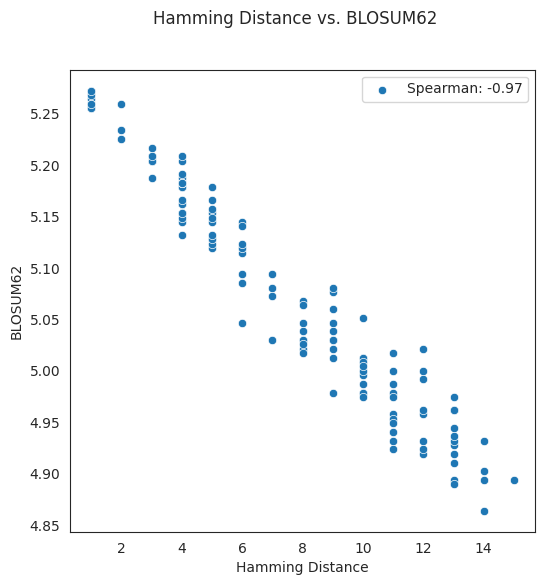

In [46]:
# plot hamming vs blosum and print its correlation
plt.figure(figsize=(6, 6))
sns.set_style("white")
plt.suptitle("Hamming Distance vs. BLOSUM62")

plt.xlabel("Hamming Distance")
plt.ylabel("BLOSUM62")
sns.scatterplot(data=df, x="mutations", y="blosum62", label=f"Spearman: {spearmanr(df['mutations'], df['blosum62'])[0]:.2f}")